✅ Loaded hybrid actual test values.

📊 ARIMA Performance Metrics
MAE  : 1152.779
RMSE : 1330.061
MAPE : inf%
R²   : -0.002

📊 Hybrid Performance Metrics
MAE  : 1095.971
RMSE : 1297.018
MAPE : inf%
R²   : 0.047

✅ Model Comparison Table:


C:\Users\Devra\AppData\Local\Temp\ipykernel_9692\2892829070.py:40: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((true - pred) / true)) * 100
C:\Users\Devra\AppData\Local\Temp\ipykernel_9692\2892829070.py:40: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((true - pred) / true)) * 100


,MAE,RMSE,MAPE (%),R²
ARIMA,1152.778764,1330.060523,inf,-0.001896
HYBRID,1095.970589,1297.018096,inf,0.047266


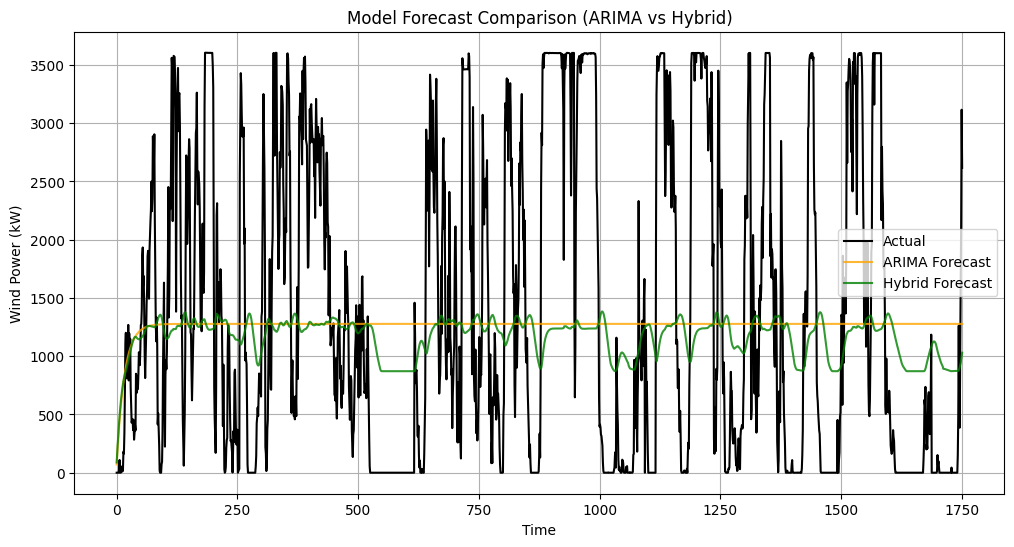


💾 Evaluation metrics saved to: C:\Users\Devra\Wind_energy_prediction\Results\evaluation_metrics.csv


In [1]:
# 05_Evaluation.ipynb — Final Evaluation of Wind Energy Forecasting Models

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ----------------------------
# Step 1: Define Paths
# ----------------------------
BASE = r"C:\Users\Devra\Wind_energy_prediction"
RESULTS_DIR = os.path.join(BASE, "Results")

# Load processed data
df = pd.read_csv(os.path.join(RESULTS_DIR, "processed_hourly.csv"), index_col=0, parse_dates=True)
target_col = "ActivePower_kW"
actual = df[target_col].values[-len(np.load(os.path.join(RESULTS_DIR, "arima_forecast.npy"))):]

# ----------------------------
# Step 2: Load Forecasts
# ----------------------------
arima_forecast = np.load(os.path.join(RESULTS_DIR, "arima_forecast.npy"))
hybrid_forecast = np.load(os.path.join(RESULTS_DIR, "hybrid_forecast.npy"))

# If available, load hybrid test actuals
try:
    hybrid_actual = np.load(os.path.join(RESULTS_DIR, "hybrid_test_actual.npy"))
    print("✅ Loaded hybrid actual test values.")
except:
    hybrid_actual = actual
    print("⚠️ 'hybrid_test_actual.npy' not found, using 'processed_hourly' last test split.")

# ----------------------------
# Step 3: Metrics Function
# ----------------------------
def evaluate_model(true, pred, name):
    mae = mean_absolute_error(true, pred)
    rmse = np.sqrt(mean_squared_error(true, pred))
    mape = np.mean(np.abs((true - pred) / true)) * 100
    r2 = r2_score(true, pred)
    print(f"\n📊 {name} Performance Metrics")
    print(f"MAE  : {mae:.3f}")
    print(f"RMSE : {rmse:.3f}")
    print(f"MAPE : {mape:.2f}%")
    print(f"R²   : {r2:.3f}")
    return [mae, rmse, mape, r2]

# ----------------------------
# Step 4: Evaluate Each Model
# ----------------------------
results = {}
results["ARIMA"] = evaluate_model(actual, arima_forecast, "ARIMA")
results["HYBRID"] = evaluate_model(hybrid_actual, hybrid_forecast, "Hybrid")

# Convert to DataFrame for clear comparison
df_results = pd.DataFrame(results, index=["MAE", "RMSE", "MAPE (%)", "R²"]).T
print("\n✅ Model Comparison Table:")
display(df_results)

# ----------------------------
# Step 5: Plot Comparisons
# ----------------------------
plt.figure(figsize=(12,6))
plt.plot(actual, label="Actual", color="black", linewidth=1.5)
plt.plot(arima_forecast, label="ARIMA Forecast", color="orange", alpha=0.8)
plt.plot(hybrid_forecast, label="Hybrid Forecast", color="green", alpha=0.8)
plt.title("Model Forecast Comparison (ARIMA vs Hybrid)")
plt.xlabel("Time")
plt.ylabel("Wind Power (kW)")
plt.legend()
plt.grid(True)
plt.show()

# ----------------------------
# Step 6: Save Evaluation Metrics
# ----------------------------
save_path = os.path.join(RESULTS_DIR, "evaluation_metrics.csv")
df_results.to_csv(save_path)
print(f"\n💾 Evaluation metrics saved to: {save_path}")
